In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/ObesityDataSet.csv')

data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [5]:
data['NObeyesdad'] = data['NObeyesdad'].map({'Obesity_Type_I': 0,
'Obesity_Type_III': 1,
'Obesity_Type_II': 2,
'Overweight_Level_I': 3,
'Overweight_Level_II': 4,
'Normal_Weight': 5,
'Insufficient_Weight': 6})

In [6]:
data_og = data.copy()
columns_obj = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
dummies = pd.get_dummies(data[columns_obj], dtype=int)
data = pd.concat([data_og, dummies], axis=1)
data = data.drop(columns_obj, axis=1)


In [7]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,5,1,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,5,1,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,5,0,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,3,0,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,4,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,1,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,1,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,1,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,1,...,0,0,0,1,0,0,0,0,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   NObeyesdad                          2111 non-null   int64  
 9   Gender_Female                       2111 non-null   int64  
 10  Gender_Male                         2111 non-null   int64  
 11  family_history_with_overweight_no   2111 no

In [9]:
X = data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']

In [10]:
from sklearn.preprocessing import StandardScaler

features = data.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
scaled_featues = scaler.fit_transform(features)

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_featues)

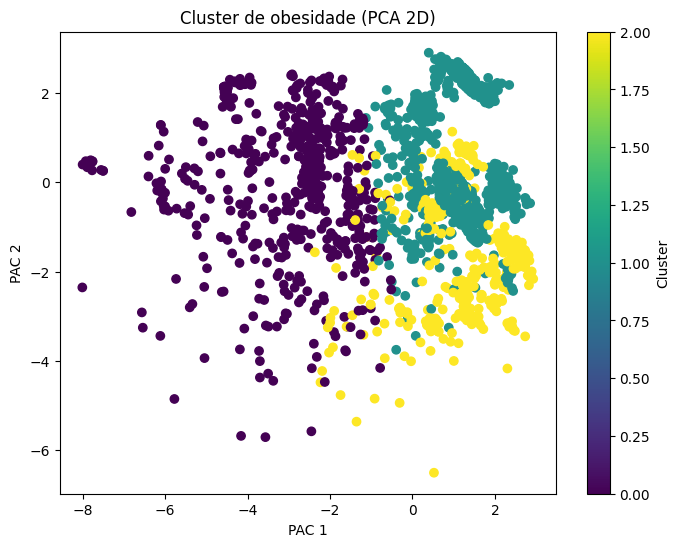

In [12]:
from sklearn. decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_featues)


plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=data['Cluster'], cmap='viridis')
plt.xlabel('PAC 1')
plt.ylabel('PAC 2')
plt.title('Cluster de obesidade (PCA 2D)')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,5,1,...,0,0,0,1,0,0,0,1,0,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,5,1,...,0,0,1,0,0,0,0,1,0,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,5,0,...,0,1,0,0,0,0,0,1,0,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,3,0,...,0,1,0,0,0,0,0,0,1,0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,4,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,1,...,0,0,1,0,0,0,0,1,0,1
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,1,...,0,0,1,0,0,0,0,1,0,1
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,1,...,0,0,1,0,0,0,0,1,0,1
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,1,...,0,0,1,0,0,0,0,1,0,1


In [14]:
data = data.drop('Cluster', axis=1)

In [15]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,5,1,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,5,1,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,5,0,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,3,0,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,4,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,1,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,1,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,1,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,1,...,0,0,0,1,0,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.9194857916102842

In [17]:
y_test[1:5]

1544    2
671     6
1295    0
1081    4
Name: NObeyesdad, dtype: int64

In [18]:
X_test[1:5]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1544,23.963649,1.792998,116.102615,1.994679,3.000000,2.000000,0.966617,0.739006,0,1,...,0,0,0,1,0,0,0,0,1,0
671,21.813083,1.712515,51.710723,2.881300,3.087544,1.248180,1.952427,0.427461,1,0,...,0,0,0,0,1,0,0,0,1,0
1295,38.148845,1.557808,79.661693,2.000000,3.000000,1.274774,0.000000,0.000000,1,0,...,0,0,0,1,0,1,0,0,0,0
1081,17.441593,1.700000,83.414072,2.061384,2.579291,1.909253,1.000000,0.962468,0,1,...,0,0,0,1,0,0,0,0,1,0


In [19]:
y_pred = model.predict(X_test[1:5])

y_pred

array([2, 6, 0, 4])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mean = mean_absolute_error(y_test, y_pred)
mse =mean_squared_error(y_test, y_pred)

print('MEAN: ', mean)
print('MSE: ', mse)

MEAN:  0.14005412719891747
MSE:  0.32949932341001353


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[237   0   2   1   9   1   0]
 [  0 232   0   0   0   0   0]
 [  0   0 212   0   0   0   0]
 [  2   0   0 155  21  16   0]
 [  5   0   0   7 169   8   0]
 [  0   0   0  16  10 174   7]
 [  0   0   0   1   0  13 180]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       250
           1       1.00      1.00      1.00       232
           2       0.99      1.00      1.00       212
           3       0.86      0.80      0.83       194
           4       0.81      0.89      0.85       189
           5       0.82      0.84      0.83       207
           6       0.96      0.93      0.94       194

    accuracy                           0.92      1478
   macro avg       0.92      0.92      0.92      1478
weighted avg       0.92      0.92      0.92      1478

